In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

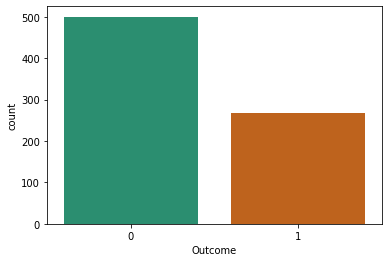

In [7]:
sns.countplot(x='Outcome',data=df, palette='Dark2')
plt.show()

In [8]:
# Replace zero values with median values for bmi and insulin columns
bmi_median = df['BMI'].median()
ins_median = df['Insulin'].median()

In [11]:
df['BMI'].replace(0,bmi_median)


0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [12]:
df['Insulin'].replace(0,ins_median)

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

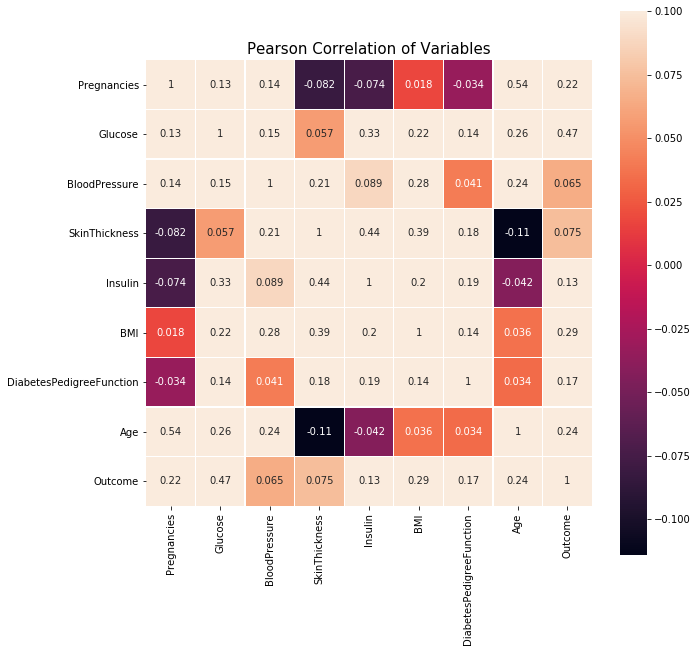

In [14]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

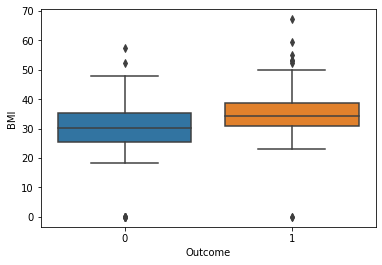

In [15]:
sns.boxplot(df.Outcome,df.BMI)

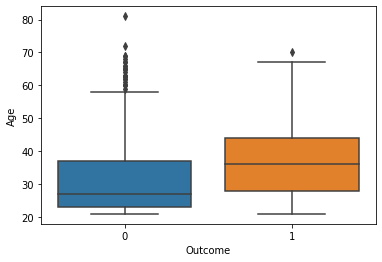

In [16]:
sns.boxplot(df.Outcome,df.Age)

In [17]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [18]:
# Dropping the target variable in X
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [20]:
sc_X = StandardScaler(with_mean=False)

In [21]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
# Implement SVM algorithm

from sklearn.svm import SVC

In [23]:
svc_model = SVC(kernel='rbf',random_state=0)

In [24]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
y_pred = svc_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,y_pred))

[[118  12]
 [ 27  35]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [29]:
# Calculate AUC and ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve

In [30]:
auc = roc_auc_score(y_test,y_pred)
print("AUC %0.3f" %auc)

AUC 0.736


In [31]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

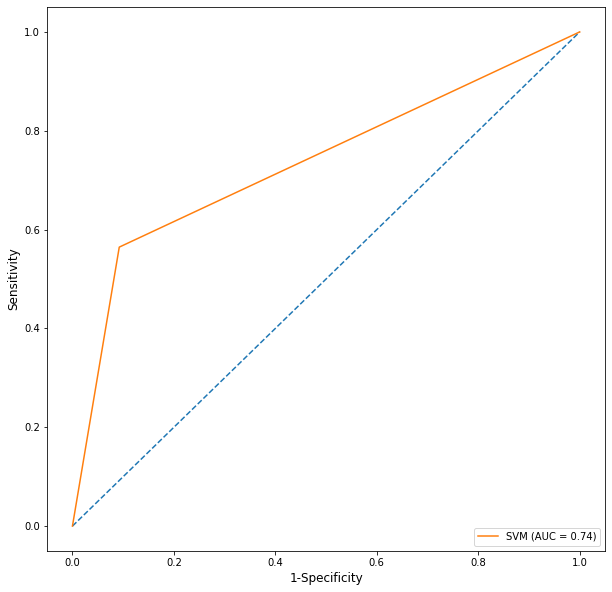

In [32]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [33]:
# Model cross validation using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [35]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [36]:
grid_predictions = grid.predict(X_test)

In [37]:
print(confusion_matrix(y_test,grid_predictions))

[[117  13]
 [ 31  31]]


In [38]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       130
           1       0.70      0.50      0.58        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



In [39]:
#Calculate AUC Score after GridSearchCV
auc_grid = roc_auc_score(y_test,grid_predictions)
print('AUC: %.3f' % auc_grid)

AUC: 0.700


In [40]:
#Calculate ROC Curve after Grid Search CV
fpr , tpr , thresholds = roc_curve(y_test,grid_predictions)

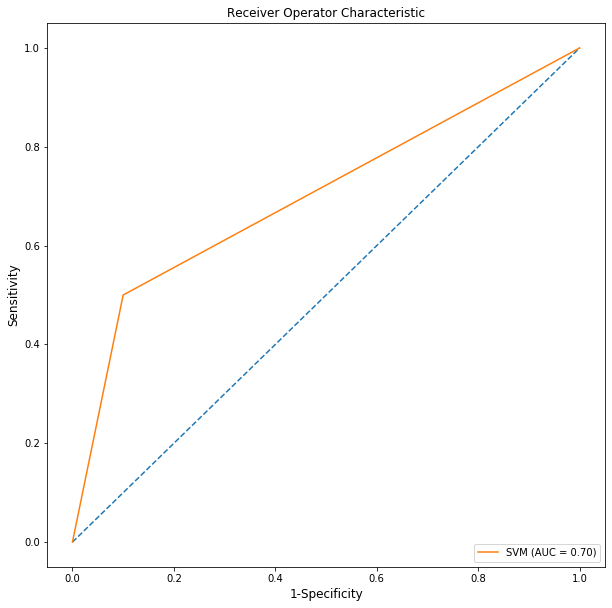

In [41]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc_grid)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [42]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.751724
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.729310
2,random_forest,{'n_estimators': 50},0.750000
3,svm,"{'C': 1, 'kernel': 'linear'}",0.755172


Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.

In [44]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 74.0%


In [45]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
#Model Evaluation
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[114,  16],
       [ 26,  36]], dtype=int64)

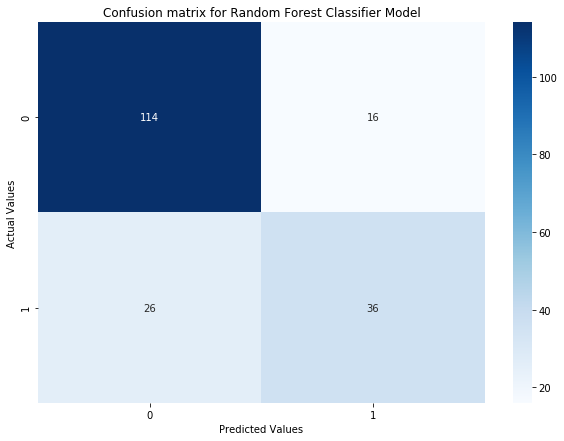

In [48]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [49]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 78.12%


In [50]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192

